<a href="https://colab.research.google.com/github/dawamamrillah/temukembalicitra/blob/main/Tubes_tkcuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Upload Data</h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/trying"

In [ ]:
%cd /content/drive/MyDrive/trying
!ls -a

/content/drive/MyDrive/trying
 brain-tumor-classification-mri.zip   Testing	'Tubes ML.ipynb'
 kaggle.json			      Training


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
import zipfile

local_zip = 'brain-tumor-classification-mri.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
%cd '/tmp/'
!ls -a

/tmp
.
..
dap_multiplexer.2a4b953d6d27.root.log.INFO.20211206-025808.49
dap_multiplexer.INFO
debugger_20wksxt5q9
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
Testing
tmpkwjx9x3s
Training


In [ ]:
train_dir = '/tmp/Training'
gli_train_dir = train_dir + '/glioma_tumor'
men_train_dir = train_dir + '/meningioma_tumor'
no_train_dir  = train_dir + '/no_tumor'
pit_train_dir = train_dir + '/pituitary_tumor'

test_dir = '/tmp/Testing'
gli_test_dir = test_dir + '/glioma_tumor'
men_test_dir = test_dir + '/meningioma_tumor'
no_test_dir  = test_dir + '/no_tumor'
pit_test_dir = test_dir + '/pituitary_tumor'

In [ ]:
print("Training")
print("Total Training Glioma Tumor     :", len(os.listdir(gli_train_dir)))
print("Total Training Meningioma Tumor :", len(os.listdir(men_train_dir)))
print("Total Training No Tumor         :", len(os.listdir(no_train_dir)))
print("Total Training Pituitary_Tumor  :", len(os.listdir(pit_train_dir)))
print("Testing")
print("Total Testing Glioma Tumor     :", len(os.listdir(gli_test_dir)))
print("Total Testing Meningioma Tumor :", len(os.listdir(men_test_dir)))
print("Total Testing No Tumor         :", len(os.listdir(no_test_dir)))
print("Total Testing Pituitary_Tumor  :", len(os.listdir(pit_test_dir)))

Training
Total Training Glioma Tumor     : 826
Total Training Meningioma Tumor : 822
Total Training No Tumor         : 395
Total Training Pituitary_Tumor  : 827
Testing
Total Testing Glioma Tumor     : 100
Total Testing Meningioma Tumor : 115
Total Testing No Tumor         : 105
Total Testing Pituitary_Tumor  : 74


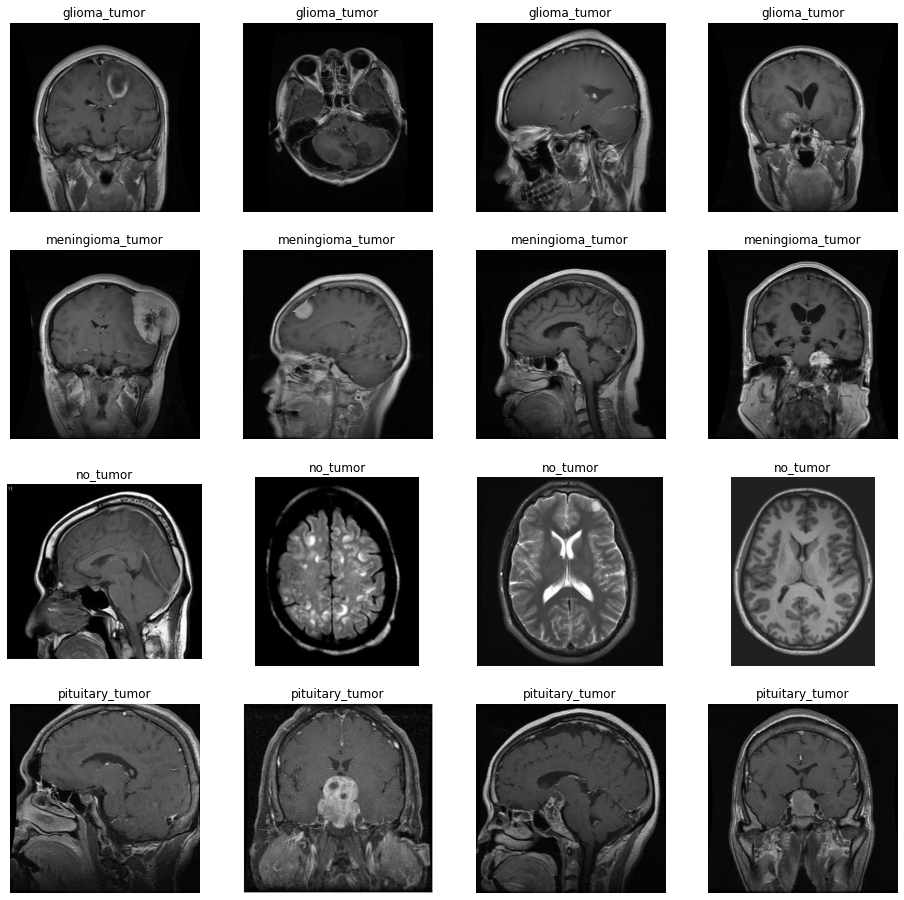

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 4)

pic_index += 8
gli_img  = [os.path.join(gli_train_dir, fname) for fname in os.listdir(gli_train_dir)[:4]]
men_img  = [os.path.join(men_train_dir, fname) for fname in os.listdir(men_train_dir)[:4]]
no_img   = [os.path.join(no_train_dir, fname) for fname in os.listdir(no_train_dir)[:4]]
pit_img  = [os.path.join(pit_train_dir, fname) for fname in os.listdir(pit_train_dir)[:4]]

for i, img_path in enumerate(gli_img+men_img+no_img+pit_img):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

In [ ]:
import cv2
import numpy as np

In [ ]:
def gather_data(data_dir):
    dir_data = []
    dir_label = []

    for dirpath, dirnames, filenames in os.walk(data_dir):
        for file in filenames:
            if ".jpg" in file:
                imagePath = os.path.join(dirpath, file)
                image = cv2.imread(imagePath)
                image = cv2.resize(image, (150,150))
                dir_data.append(image)
                label = imagePath.split(os.path.sep)[-2]
                dir_label.append(label)

    dir_data = np.array(dir_data)
    dir_label = np.array(dir_label)

    return dir_data, dir_label

<h3>Data Preprocessing</h3>

In [ ]:
train_data, train_label = gather_data(train_dir) # Gather data train
test_data, test_label = gather_data(test_dir) # Gather data test

In [ ]:
print("Train Data  = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data   = ", test_data.shape)
print("Test Label  = ", test_label.shape)

Train Data  =  (2870, 150, 150, 3)
Train Label =  (2870,)
Test Data   =  (394, 150, 150, 3)
Test Label  =  (394,)


In [ ]:
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['pituitary_tumor' 'pituitary_tumor' 'pituitary_tumor' 'pituitary_tumor'
 'pituitary_tumor' 'pituitary_tumor' 'pituitary_tumor' 'pituitary_tumor'
 'pituitary_tumor' 'pituitary_tumor']
Label setelah di-encoder  [3 3 3 3 3 3 3 3 3 3]


<h3>Definisikan Model</h3>

In [ ]:
import tensorflow

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 4)
y_test = tensorflow.keras.utils.to_categorical(y_test, 4)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Activation

In [ ]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tqdm import tqdm
import os
from sklearn.utils import shuffle

import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(150,150,3))

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 150, 150, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 151, 151, 3)  0           ['normalization[0][0]']    

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=5)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
90/90 [==============================] - 6s 56ms/step - loss: 3.0538 - acc: 0.5275 - val_loss: 3.4165 - val_acc: 0.4391
Epoch 2/100
90/90 [==============================] - 5s 52ms/step - loss: 0.9962 - acc: 0.6763 - val_loss: 4.7937 - val_acc: 0.4289
Epoch 3/100
90/90 [==============================] - 5s 52ms/step - loss: 0.7664 - acc: 0.7530 - val_loss: 3.3318 - val_acc: 0.5685
Epoch 4/100
90/90 [==============================] - 5s 52ms/step - loss: 0.5728 - acc: 0.7794 - val_loss: 3.1703 - val_acc: 0.5964
Epoch 5/100
90/90 [==============================] - 5s 53ms/step - loss: 0.4725 - acc: 0.8146 - val_loss: 4.7686 - val_acc: 0.4289
Epoch 6/100
90/90 [==============================] - 5s 53ms/step - loss: 0.4163 - acc: 0.8488 - val_loss: 3.2278 - val_acc: 0.6142
Epoch 7/100
90/90 [==============================] - 5s 53ms/step - loss: 0.3500 - acc: 0.8610 - val_loss: 4.0436 - val_acc: 0.5863
Epoch 8/100
90/90 [==============================] - 5s 53ms/step - loss: 0.

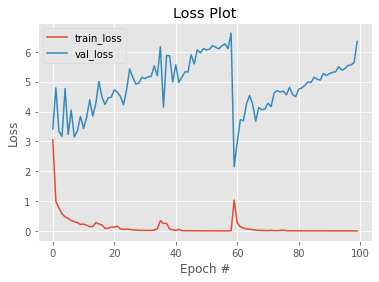

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

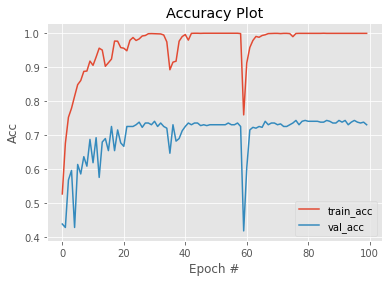

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       822
           2       1.00      1.00      1.00       395
           3       1.00      1.00      1.00       827

   micro avg       1.00      1.00      1.00      2870
   macro avg       1.00      1.00      1.00      2870
weighted avg       1.00      1.00      1.00      2870
 samples avg       1.00      1.00      1.00      2870



In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.96      0.24      0.38       100
           1       0.69      0.97      0.80       115
           2       0.69      1.00      0.81       105
           3       0.89      0.65      0.75        74

   micro avg       0.73      0.73      0.73       394
   macro avg       0.81      0.71      0.69       394
weighted avg       0.79      0.73      0.69       394
 samples avg       0.73      0.73      0.73       394

